# Prediction Observation Classification Pipeline

- **Goal:** Prediction Classification

In [1]:
import os
import sys

import importlib.util

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from data_processing import DataProcessing
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction
from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

# Absolute path to your local classification_models.py file
# project_root = "/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions"
# project_root = "toorange/dj.brinkley/predictions"
# module_path = os.path.join(project_root, "classification_models.py")

# # Dynamically load the module so it overrides any installed package
# spec = importlib.util.spec_from_file_location("classification_models", module_path)
# classification_models = importlib.util.module_from_spec(spec)
# spec.loader.exec_module(classification_models)

# # Inject into sys.modules so pickle uses this
# sys.modules["classification_models"] = classification_models

# # ✅ Now you can use the classes
# perception_model = classification_models.SkLearnPerceptronModel()
# sgd_model = classification_models.SkLearnSGDClassifier()
# EvaluationMetric = classification_models.EvaluationMetric
# from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

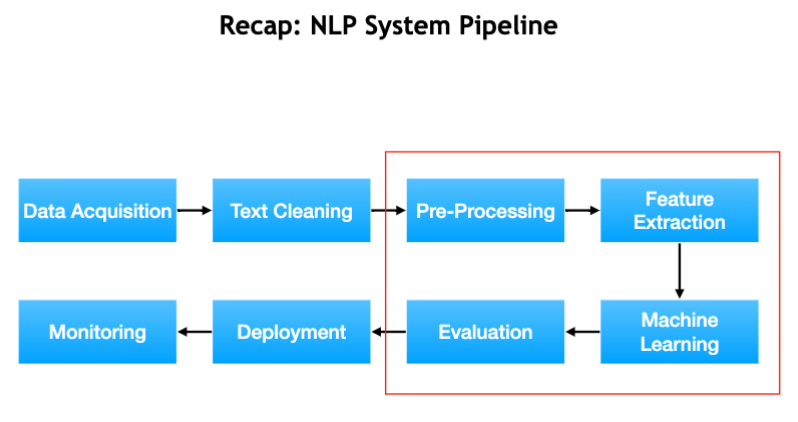

In [2]:
Image(filename='../misc_experiments/base_pipeline.png')

## 1-Data Acquisition

In [3]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
log_file_path = "data/prediction_logs"
predictions = True
predictions_df = log_files.read_data(notebook_dir, log_file_path, predictions)
len(predictions_df), predictions_df.head(7)

Start logging batch
log_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs
300
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_1-prediction
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_1-prediction/batch_1-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_2-prediction
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_2-prediction/batch_2-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_3-prediction
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/prediction_logs/batch_3-prediction/batch_3-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../da

(21956,
                                                                                                                                Base Sentence  \
 0                       Detravious, a financial analyst forecasts that the stock price at Johnson & Johnson will likely decrease in 2027 Q2.   
 1                               On August 21, 2024, Goldman Sachs speculates that the operating cash flow at Microsoft will likely increase.   
 2                                          Morgan Stanley predicts that on September 15, 2025, the S&P 500 composite index will likely rise.   
 3                                                           According to Apple, the projected revenue at Amazon will likely fall in Q4 2026.   
 4                                                      In Q2 2025, Wells Fargo envisions that the U.S. dollar index will likely stay stable.   
 5                                                 The Dow Jones Industrial Average will likely rise in Q3 2027, according

In [5]:
log_file_path = "data/observation_logs"
predictions = False
observations_df = log_files.read_data(notebook_dir, log_file_path, predictions)
len(observations_df), observations_df.head(7)

Start logging batch
log_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs
44
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_1-observation
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_1-observation/batch_1-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_2-observation
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_2-observation/batch_2-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_3-observation
CSV to DF
Load saved csv: /orange/ufdatastudios/dj.brinkley/predictions/pipelines/../data/observation_logs/batch_3-observation/batch_3-from_df.csv
save_batch_directory: /orange/ufdatastudios/dj.brinkley/predictions/pip

(8830,
                                                                                                                      Base Sentence  \
 0                     The financial analyst at Goldman Sachs observed that the operating income at Tesla had increased in Q4 2027.   
 1              On 02/20/2026 to 02/20/2027, the research advisor at Harvard University monitored the net profit at Amazon changed.   
 2                                                                  Morgan Stanley noted on 08/15/2025, the revenue at Google fell.   
 3                                    According to the financial expert at Bloomberg, the stock price at Microsoft rose in Q1 2028.   
 4     In 2029 of Q3, the senior level person at Apple envisioned that the research and development expenses at Facebook decreased.   
 5             The gross profit at Johnson & Johnson increased in 2025, according to the financial top executive at JPMorgan Chase.   
 6  JPMorgan Chase observed that the operating i

## 2-Data Processing

In [6]:
pred_obs_dfs = [predictions_df, observations_df]
base_df = DataProcessing.concat_dfs(pred_obs_dfs)
shuffled_base_df = DataProcessing.shuffle_df(base_df)
len(shuffled_base_df), shuffled_base_df.head(7)

(30786,
                                                                                                                                                                                                     Base Sentence  \
 0                                                                                                                             Coach Tom Williams predicts on 21/08/2024, the goal count at FC Barcelona may rise.   
 1                                                                                 On September 15, 2025, I predict that the regulatory compliance requirements in the financial sector will potentially decrease.   
 2                                                                                             On 08/21/2024, the National Weather Service speculates that the precipitation levels in Miami will likely increase.   
 3                                                                                    In 2026 of Q2, the National Weather Service envisi

## 3-Feature Extraction

### TF x IDF

In [7]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(3)

Base Sentence  \
0                                                                                                                             Coach Tom Williams predicts on 21/08/2024, the goal count at FC Barcelona may rise.   
1                                                                                 On September 15, 2025, I predict that the regulatory compliance requirements in the financial sector will potentially decrease.   
2                                                                                             On 08/21/2024, the National Weather Service speculates that the precipitation levels in Miami will likely increase.   
3                                                                                    In 2026 of Q2, the National Weather Service envisions that the temperature at Chicago has some probability to remain stable.   
4                                                                                                                                   According to Apple, the returns at emerging market equities fell in May 2035.   
5                                                                 The Centers for Disease Control and Prevention (CDC) predicts that on 08/21/2024, public engagement in preventative health screenings may rise.   
6  According to a miscellaneous senior level person, the number of cybersecurity breaches in the financial sector would fall in 2026, thanks to the implementation of advanced security measures and regulations.   

   Sentence Label  000   01   02   03   04   05   06   07        08   09   10  \
0               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.165653  0.0  0.0   
1               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
2               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.213908  0.0  0.0   
3               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
4               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   
5               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.143830  0.0  0.0   
6               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   

   10th   11  11th   12   13   14  14th        15  15th   16   17   18   19  \
0   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   
1   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.217915   0.0  0.0  0.0  0.0  0.0   
2   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   
3   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   
5   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.000000   0.0  0.0  0.0  0.0  0.0   

   1997  1st   20  2010  2012  2014  2015  2016  2018  2019  2020  2021  2022  \
0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   2023      2024      2025      2026  2027  2028  2029  2030  2031  2032  \
0   0.0  0.116064  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.000000  0.175166  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0  0.149873  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0  0.000000  0.000000  0.265478   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0  0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
5   0.0  0.100773  0.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
6   0.0  0.000000  0.

### POS and NER

In [9]:
!python -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 8.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [10]:
pos_ner_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, "Base Sentence")
sentences = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
word_leveL_disable_components = ["lemmatizer"]
all_pos_tags, word_to_pos_mapping, all_ner_entities, word_to_ner_mappings =  pos_ner_feature_extractor.extract_features(data=sentences, disable_components=word_leveL_disable_components)

Spacy Doc (0):  Coach Tom Williams predicts on 21/08/2024, the goal count at FC Barcelona may rise.
Spacy Doc (1):  On September 15, 2025, I predict that the regulatory compliance requirements in the financial sector will potentially decrease.
Spacy Doc (2):  On 08/21/2024, the National Weather Service speculates that the precipitation levels in Miami will likely increase.
Spacy Doc (3):  In 2026 of Q2, the National Weather Service envisions that the temperature at Chicago has some probability to remain stable.


DET_5  AUX_1 ADV_2 PROPN_11   PROPN_2 PUNCT_7         NOUN_4 PROPN_7  \
0   NaN    may   NaN      NaN       Tom     NaN            NaN     NaN   
1   NaN   will   NaN      NaN       NaN     NaN            NaN     NaN   
2   NaN   will   NaN      NaN   Weather     NaN            NaN     NaN   
3   NaN    NaN   NaN      NaN  National     NaN            NaN     NaN   
4   NaN    NaN   NaN      NaN       May     NaN            NaN     NaN   
5   NaN    may   NaN      NaN   Disease     NaN            NaN     NaN   
6   NaN  would   NaN      NaN       NaN     NaN  cybersecurity     NaN   

    NOUN_10 ADP_4 PROPN_13 NUM_5 ADP_6 NUM_2 DET_6 SYM_4    NOUN_9 CCONJ_3  \
0       NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN       NaN     NaN   
1       NaN   NaN      NaN   NaN   NaN  2025   NaN   NaN       NaN     NaN   
2       NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN       NaN     NaN   
3       NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN       NaN     NaN   
4       NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN       NaN     NaN   
5       NaN   NaN      NaN   NaN   NaN   NaN   NaN   NaN       NaN     NaN   
6  measures    in      NaN   NaN    of   NaN   NaN   NaN  security     NaN   

       NOUN_3    VERB_2 PUNCT_6 ADP_9 SCONJ_2   PROPN_3 ADJ_6 VERB_6  \
0         NaN      rise     NaN   NaN     NaN  Williams   NaN    NaN   
1      sector  decrease     NaN   NaN     NaN       NaN   NaN    NaN   
2         NaN  increase     NaN   NaN     NaN   Service   NaN    NaN   
3         NaN       has     NaN   NaN     NaN   Weather   NaN    NaN   
4    equities  emerging     NaN   NaN     NaN       NaN   NaN    NaN   
5  screenings      rise     NaN   NaN     NaN   Control   NaN    NaN   
6      number      fall     NaN   NaN     NaN       NaN   NaN    NaN   

      PROPN_4    PROPN_5 PROPN_12  X_5 ADP_5 VERB_5 ADP_2 PART_3 AUX_2 ADP_1  \
0          FC  Barcelona      NaN  NaN   NaN    NaN    at    NaN   NaN    on   
1         NaN        NaN      NaN  NaN   NaN    NaN    in    NaN   NaN    On   
2       Miami        NaN      NaN  NaN   NaN    NaN    in    NaN   NaN    On   
3     Service    Chicago      NaN  NaN   NaN    NaN    of    NaN   NaN    In   
4         NaN        NaN      NaN  NaN   NaN    NaN    at    NaN   NaN    to   
5  Prevention        CDC      NaN  NaN   NaN    NaN    on    NaN   NaN   for   
6         NaN        NaN      NaN  NaN    to    NaN    of    NaN   NaN    to   

  NUM_3 CCONJ_1 NUM_4 DET_4 ADP_10 SCONJ_1 DET_2 ADP_8 PUNCT_5 PUNCT_2  \
0   NaN     NaN   NaN   NaN    NaN     NaN   NaN   NaN     NaN       .   
1   NaN     NaN   NaN   NaN    NaN    that   the   NaN     NaN       ,   
2   NaN     NaN   NaN   NaN    NaN    that   the   NaN     NaN       .   
3   NaN     NaN   NaN   NaN    NaN    that   the   NaN     NaN       .   
4   NaN     NaN   NaN   NaN    NaN     NaN   NaN   NaN     NaN       .   
5   NaN     and   NaN   NaN    NaN    that   NaN   NaN     NaN       )   
6   NaN     and   NaN   the    NaN     NaN   the   NaN     NaN       ,   

  PROPN_6 VERB_4 PROPN_8 SYM_1 PART_1 ADJ_7 PROPN_10 SYM_2          ADJ_1  \
0     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN            NaN   
1     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN     regulatory   
2     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN            NaN   
3     NaN    NaN     NaN   NaN     to   NaN      NaN   NaN         stable   
4     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN            NaN   
5     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN         public   
6     NaN    NaN     NaN   NaN    NaN   NaN      NaN   NaN  miscellaneous   

         NOUN_2 PUNCT_3      ADJ_3     ADJ_4    NOUN_5 NUM_6 PRON_3  \
0         count     NaN        NaN       NaN       NaN   NaN    NaN   
1  requirements       .        NaN       NaN       NaN   NaN    NaN   
2        levels     NaN        NaN       NaN       NaN   NaN    NaN   
3   probability     NaN        NaN       NaN       NaN   NaN    NaN   
4

In [ ]:
pos_df = DataProcessing.convert_to_df(all_pos_tags, mapping=word_to_pos_mapping)
ner_df = DataProcessing.convert_to_df(all_ner_entities, word_to_ner_mappings)
pos_ner_features = [pos_df, ner_df]
pos_ner_features_df = DataProcessing.concat_dfs(pos_ner_features, axis=1, ignore_index=False)
pos_ner_features_df.head(7)

In [11]:
encoded_pos_ner_df = DataProcessing.encode_tags_entities_df(pos_ner_features_df, sentence_and_label_df=shuffled_base_df)
encoded_pos_ner_df.head(3)

Base Sentence  \
0                                              Coach Tom Williams predicts on 21/08/2024, the goal count at FC Barcelona may rise.   
1  On September 15, 2025, I predict that the regulatory compliance requirements in the financial sector will potentially decrease.   
2              On 08/21/2024, the National Weather Service speculates that the precipitation levels in Miami will likely increase.   

   Sentence Label  DET_5  AUX_1  ADV_2  PROPN_11  PROPN_2  PUNCT_7  NOUN_4  \
0               1      0      1      0         0        1        0       0   
1               1      0      1      0         0        0        0       0   
2               1      0      1      0         0        1        0       0   

   PROPN_7  NOUN_10  ADP_4  PROPN_13  NUM_5  ADP_6  NUM_2  DET_6  SYM_4  \
0        0        0      0         0      0      0      0      0      0   
1        0        0      0         0      0      0      1      0      0   
2        0        0      0         0      0      0      0      0      0   

   NOUN_9  CCONJ_3  NOUN_3  VERB_2  PUNCT_6  ADP_9  SCONJ_2  PROPN_3  ADJ_6  \
0       0        0       0       1        0      0        0        1      0   
1       0        0       1       1        0      0        0        0      0   
2       0        0       0       1        0      0        0        1      0   

   VERB_6  PROPN_4  PROPN_5  PROPN_12  X_5  ADP_5  VERB_5  ADP_2  PART_3  \
0       0        1        1         0    0      0       0      1       0   
1       0        0        0         0    0      0       0      1       0   
2       0        1        0         0    0      0       0      1       0   

   AUX_2  ADP_1  NUM_3  CCONJ_1  NUM_4  DET_4  ADP_10  SCONJ_1  DET_2  ADP_8  \
0      0      1      0        0      0      0       0        0      0      0   
1      0      1      0        0      0      0       0        1      1      0   
2      0      1      0        0      0      0       0        1      1      0   

   PUNCT_5  PUNCT_2  PROPN_6  VERB_4  PROPN_8  SYM_1  PART_1  ADJ_7  PROPN_10  \
0        0        1        0       0        0      0       0      0         0   
1        0        1        0       0        0      0       0      0         0   
2        0        1        0       0        0      0       0      0         0   

   SYM_2  ADJ_1  NOUN_2  PUNCT_3  ADJ_3  ADJ_4  NOUN_5  NUM_6  PRON_3  \
0      0      0       1        0      0      0       0      0       0   
1      0      1       1        1      0      0       0      0       0   
2      0      0       1        0      0      0       0      0       0   

   NOUN_11  PUNCT_8  DET_3  AUX_3  SYM_3  X_2  VERB_1  NOUN_7  X_3  DET_1  \
0        0        0      0      0      0    0       1       0    0      1   
1        0        0      0      0      0    0       1       0    0      1   
2        0        0      0      0      0    0       1       0    0      1   

   ADJ_5  VERB_3  PUNCT_4  X_1  NUM_1  ADV_1  PRON_1  CCONJ_2  PUNCT_1  \
0      0       0        0    0      1      0       0        0        1   
1      0       0        0    0      1      1       1        0        1   
2      0       0        0    0      1      1       0        0        1   

   NOUN_12  PROPN_9  NOUN_1  ADP_3  NOUN_6  NOUN_8  PROPN_1  ADJ_2  PRON_2  \
0        0        0       1      0       0       0        1      0       0   
1        0        0       1      0       0       0        1      1       0   
2        0        0       1      0       0       0        1      0       0   

   X_4  ADP_7  PART_2  PERSON_2  PERSON_1  NORP_1  FAC_1  ORDINAL_1  DATE_1  \
0    0      0       0         0         1       0      0          0       1   
1    0      0       0         0         0       0      0          0       1   
2    0      0       0         0         0       0      0          0       0   

   GPE_2  GPE_1  ORG_3  FAC_2  TIME_2  ORG_1  WORK_OF_ART_1  CARDINAL_1  \
0      1      1      0      0       0      0              0           0   
1      0      0    

In [12]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_pos_ner_df.iloc[:, :2]).all().all()
comparison_result

True

In [13]:
# If we don't (.iloc[:, 2:]), the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_pos_ner_df = encoded_pos_ner_df.iloc[:, 2:]
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_pos_ner_df], axis=1)
sentence_label_features_df.head(3)

0     \
0                                              Coach Tom Williams predicts on 21/08/2024, the goal count at FC Barcelona may rise.   
1  On September 15, 2025, I predict that the regulatory compliance requirements in the financial sector will potentially decrease.   
2              On 08/21/2024, the National Weather Service speculates that the precipitation levels in Miami will likely increase.   

   1     2     3     4     5     6     7     8     9         10    11    12    \
0     1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.165653   0.0   0.0   
1     1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
2     1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.213908   0.0   0.0   

   13    14    15    16    17    18    19        20    21    22    23    24    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.217915   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

   25    26    27    28    29    30    31    32    33    34    35    36    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   37    38    39        40        41    42    43    44    45    46    47    \
0   0.0   0.0   0.0  0.116064  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0  0.000000  0.175166   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0  0.149873  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   60    61    62    63        64    65    66    67    68    69    70    71    \
0   0.0   0.0   0.0   0.0  0.144404   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0  0.186469   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   108   109   110   111   112   113   114   115   116   117   118   119   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   120   121   122   123   124   125   126   127   128   129   130   131   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   132   133   134   135   136   137   138   139   140   141   142   143   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [21]:
# sentence_label_features_df[2]

In [15]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train.head(3)

0     \
9798                                                         The Weather Channel forecasts that the temperature at New York City will potentially decrease in early September 2025.   
6169                                                                                            Coach Alex Chen noted on 02/28/2026, the foul count at the Philadelphia 76ers fell.   
5117                                                                                                   JP Morgan Chase predicts that on 01/01/2025, the revenue of Amazon may rise.   
10497            On September 15, 2025, I predict that the regulatory hurdles in the technology sector will potentially decrease, according to policy expert Dr. Samantha Reynolds.   
14811                                                    According to miscellaneous senior level person Ms. Emily Johnson, the unemployment rate in the US will fall in 2029 of Q3.   
4506                                                                         On 03/15/2022, the sports reporter noted that the interception count at the Green Bay Packers changed.   
6095                                A senior level person at the American Heart Association predicts that on 2024/08/21, the average physical activity levels in the U.S. may rise.   
10370                                                                                           According to the Weather Channel, the humidity at Houston would fall in 2029 of Q3.   
16582                                                                                In 2024-03, Meteorologist Michael Davis envisioned that the cloud coverage at Miami decreased.   
24413                                                                 According to Analyst Sarah Taylor, the scoring average at the Golden State Warriors would fall in Q3 of 2027.   
19793                                       The International Energy Agency forecasts that the renewable energy investments at emerging markets potentially decrease in Q2 of 2028.   
14156                                                                          The Weather Channel forecasts that the wind speed at New Orleans potentially decrease in Q3 of 2027.   
9267                                                              The Golden State Warriors' point average should stay the same in 2025-10, according to sports analyst Maria Chen.   
2748                                                                            Renewable energy investments are expected to stay stable in Q2 2026, according to Dr. Sophia Patel.   
14081                 In August 21, 2024, the research advisor at Academic Insights envisions that the publication rate at Scholar's Journal has some probability to remain stable.   
8028                                                                                         According to the Miami Weather Bureau, the humidity at Miami would fall in Q3 of 2027.   
24049                                                                According to economist Dr. Sofia Mendez, the unemployment rate in the technology sector would fall in Q2 2024.   
13295             The miscellaneous expert predicts that on 2024-08-21, the number of remote workers in the US will rise as companies continue to adopt flexible work arrangements.   
1006                                                                              The college student noted on 09/2023, the difficulty of the midterm exams at the university fell.   
15322                                                                                      The Weather Channel predicts that on 1/1/2030, the wind speed at Los Angeles could rise.   
10483  On 1st July 2030, Dr. Emily Chen, a research advisor at the National Institutes of Health, recorded that the rate of smoking among teenagers in the United States decreased.   
3942                                                                  On 12/15/2028, the Congressional Budget Office monitored the healthcare spendin

In [16]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [17]:
# y_train_prediction_labels

In [28]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences[:3]

15287                                                             On 08/21/2024, sport expert Mr. Ethan Thompson speculates the win percentage at the New York Yankees will likely increase.
27360                                                                             The wind speed at Phoenix should stay the same in 21 August 2024, according to the Arizona Weather Bureau.
9838     On August 21, 2024, the Centers for Disease Control and Prevention (CDC) speculates that the prevalence of diabetes in rural communities in the United States will likely increase.
Name: 0, dtype: object

In [29]:
y_test_prediction_labels[:3]

15287    1
27360    1
9838     1
Name: 1, dtype: int64

In [30]:
perception_model = SkLearnPerceptronModel()
perception_model.train_model(X_train_features_df, y_train_prediction_labels)
perceptron_predictions = perception_model.predict(X_test_features_df)
perceptron_predictions.to_numpy().ravel()
perceptron_predictions[:3]

0    1
1    1
2    1
dtype: int64

In [31]:
sgd_model = SkLearnSGDClassifier()
sgd_model.train_model(X_train_features_df, y_train_prediction_labels)
sgd_predictions = sgd_model.predict(X_test_features_df)
sgd_predictions.to_numpy().ravel()
sgd_predictions[:3]

0    1
1    1
2    1
dtype: int64

In [32]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df.head(3)

Sentence  \
15287                                                           On 08/21/2024, sport expert Mr. Ethan Thompson speculates the win percentage at the New York Yankees will likely increase.   
27360                                                                           The wind speed at Phoenix should stay the same in 21 August 2024, according to the Arizona Weather Bureau.   
9838   On August 21, 2024, the Centers for Disease Control and Prevention (CDC) speculates that the prevalence of diabetes in rural communities in the United States will likely increase.   

       Actual Label  
15287             1  
27360             1  
9838              1

In [33]:
model_predictions_df['Perceptron Predicted Label'] = perceptron_predictions.to_numpy().ravel()
model_predictions_df['SGD Predicted Label'] = sgd_predictions.to_numpy().ravel()
model_predictions_df.head(3)

Sentence  \
15287                                                           On 08/21/2024, sport expert Mr. Ethan Thompson speculates the win percentage at the New York Yankees will likely increase.   
27360                                                                           The wind speed at Phoenix should stay the same in 21 August 2024, according to the Arizona Weather Bureau.   
9838   On August 21, 2024, the Centers for Disease Control and Prevention (CDC) speculates that the prevalence of diabetes in rural communities in the United States will likely increase.   

       Actual Label  Perceptron Predicted Label  SGD Predicted Label  
15287             1                           1                    1  
27360             1                           1                    1  
9838              1                           1                    1

## Evaluation

In [34]:
get_metrics = EvaluationMetric()

In [35]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, perceptron_predictions)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      4419

    accuracy                           1.00      6158
   macro avg       1.00      1.00      1.00      6158
weighted avg       1.00      1.00      1.00      6158



In [36]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, sgd_predictions)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1739
           1       1.00      1.00      1.00      4419

    accuracy                           1.00      6158
   macro avg       1.00      1.00      1.00      6158
weighted avg       1.00      1.00      1.00      6158



In [ ]:
# import pickle
# base_dir = os.path.join(notebook_dir, '../models')
# sgd_path = os.path.join(base_dir, 'sgd_model.pkl')
# with open(sgd_path, 'wb') as file:
#     pickle.dump(sgd_model, file)

In [ ]:
# sgd_path